In [74]:
# Importando o dataset
import pandas as pd

df = pd.read_excel('satveg_planilha.xlsx')
df.head()


,Data,NDVI
0,18/02/2000,0.6671
1,05/03/2000,0.6692
2,21/03/2000,0.7197
3,06/04/2000,0.6641
4,22/04/2000,0.6433


<Axes: >

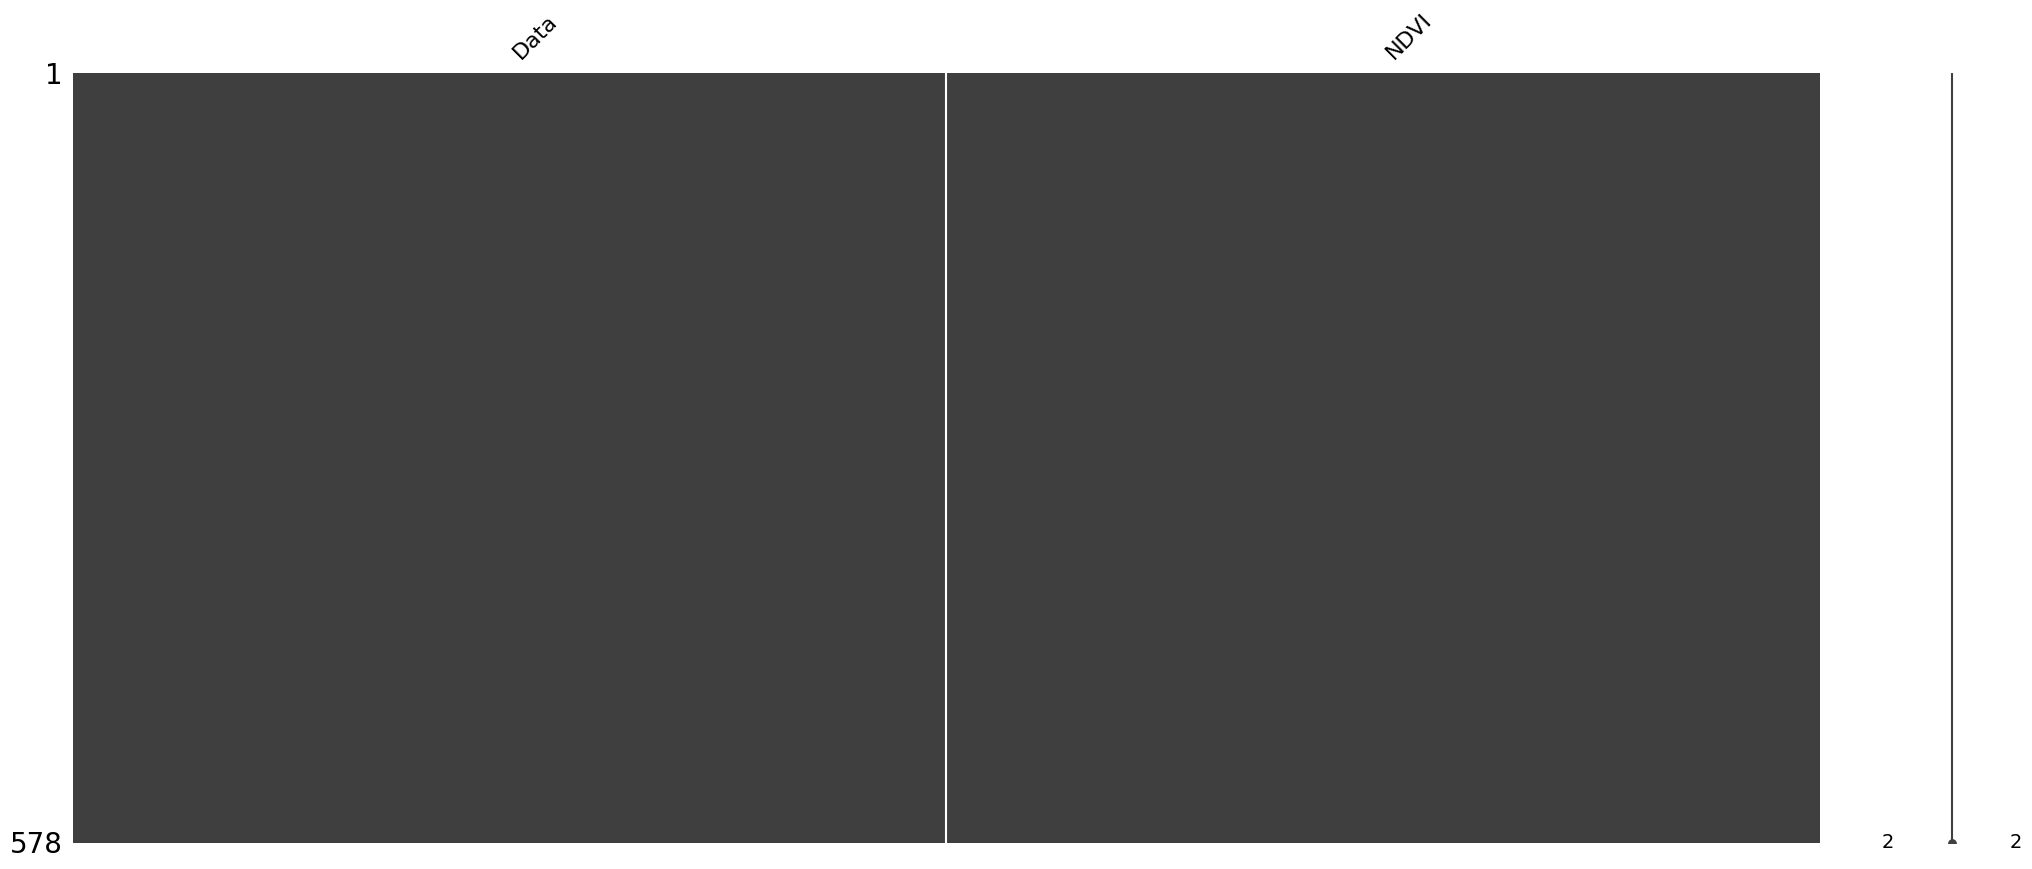

In [75]:
#Vendo se o dataset possui algum valor nulo
import missingno as msno
msno.matrix(df)

In [76]:
# Calcular a média anual de NDVI
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

df_ndvi = df.copy()
df_ndvi['Ano'] = df['Data'].dt.year
df_ndvi_anual = df_ndvi.groupby('Ano')['NDVI'].mean().reset_index()
df_ndvi_anual['NDVI'] = df_ndvi_anual['NDVI'].round(4)

df_ndvi_anual.head(10)  # Mostrar os primeiros anos para conferência


,Ano,NDVI
0,2000,0.5254
1,2001,0.5870
2,2002,0.5411
3,2003,0.5328
4,2004,0.5199
5,2005,0.5336
6,2006,0.5487
7,2007,0.4750
8,2008,0.4878
9,2009,0.6404


In [77]:
# Importando o dataset
dfbras = pd.read_csv('producaobrasilandia.csv')
dfbras.head()

,Ano,Soja (t/ha),Milho (safrinha) (t/ha),Cana-de-Açúcar (t/ha),Algodão (caroço) (t/ha)
0,2000,2.30,2.8,68.0,NaN
1,2001,2.35,2.9,68.5,NaN
2,2002,2.40,3.0,69.0,NaN
3,2003,2.45,3.1,69.5,NaN
4,2004,2.50,3.2,70.0,2.5


<Axes: >

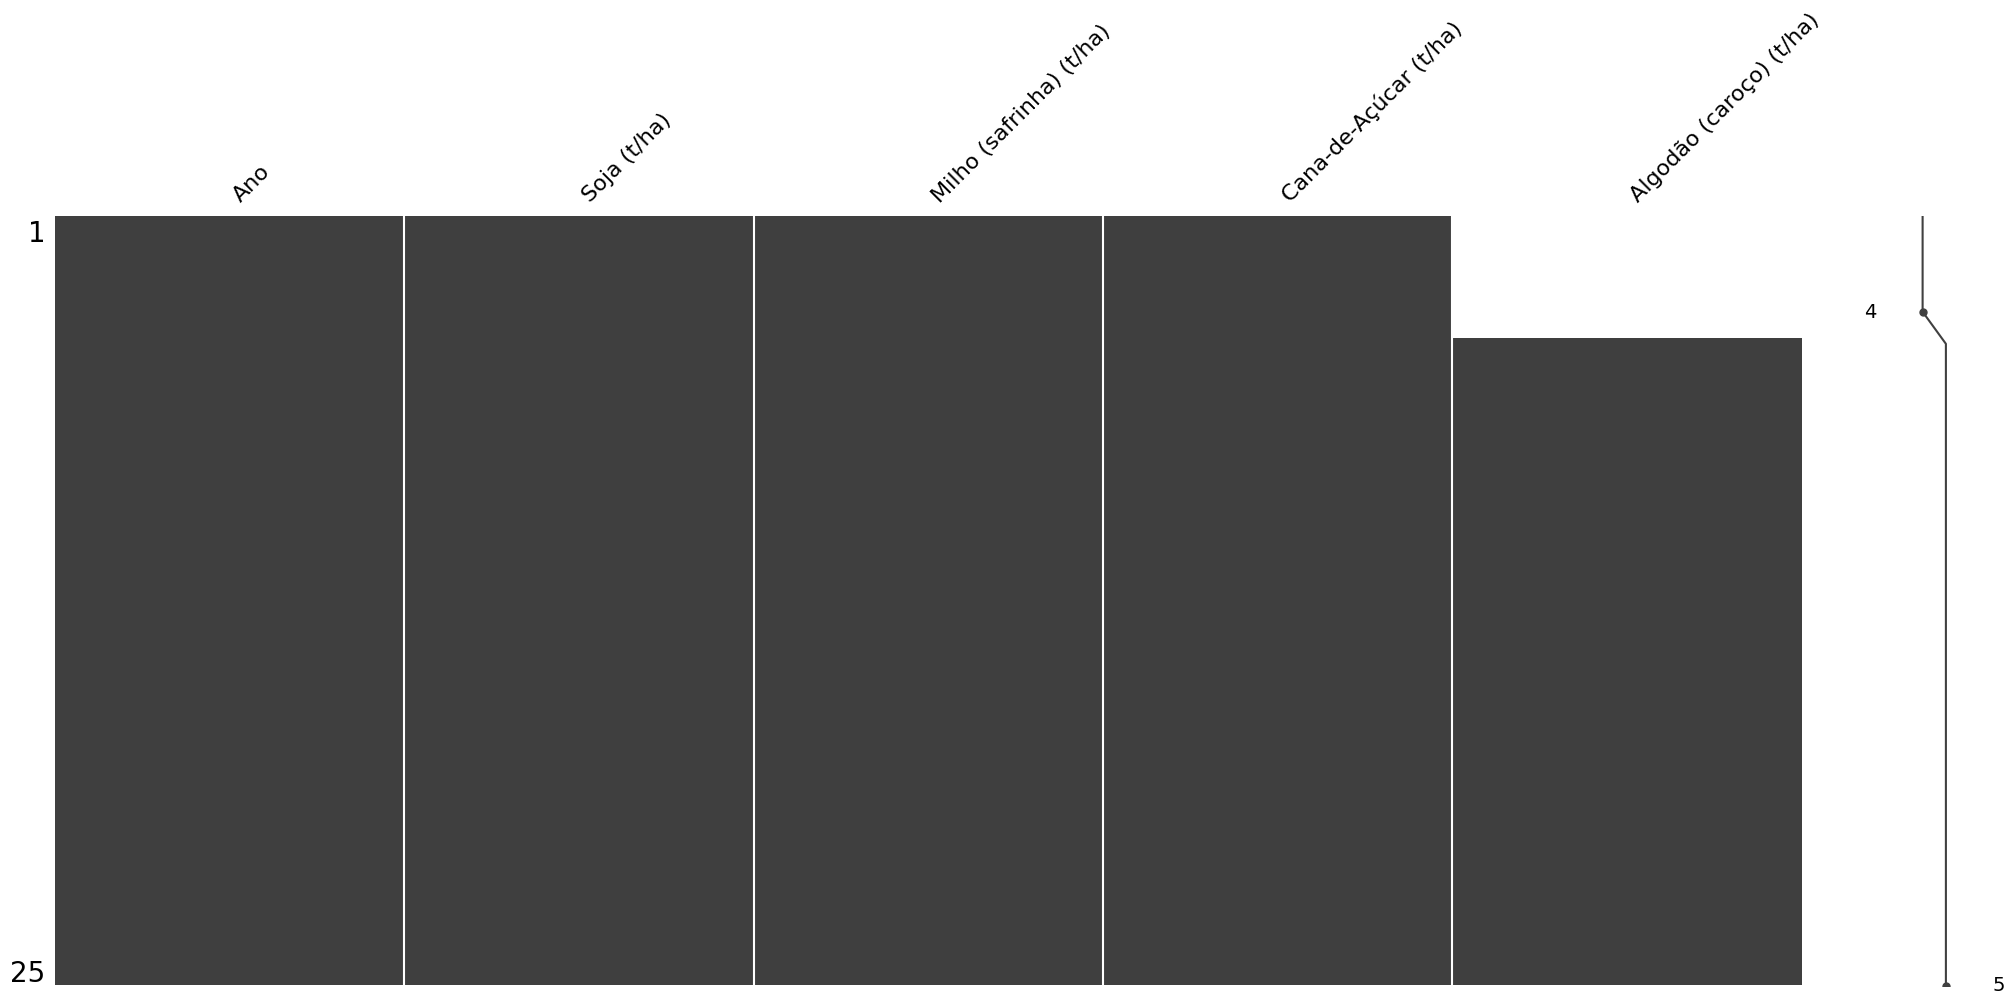

In [78]:
#Vendo se o dataset possui algum valor nulo
msno.matrix(dfbras)

In [79]:
# mudando os valor nulo para 0
dfbras = dfbras.fillna(0)

In [80]:
#somando todas as produção das culturas em uma unica coluna
print(dfbras.columns)

dfbras['Prod'] = dfbras['Soja (t/ha)'] + dfbras['Milho (safrinha) (t/ha)'] + dfbras['Cana-de-Açúcar (t/ha)'] + dfbras['Algodão (caroço) (t/ha)']
dfbras = dfbras.drop(['Soja (t/ha)', 'Milho (safrinha) (t/ha)', 'Cana-de-Açúcar (t/ha)', 'Algodão (caroço) (t/ha)'], axis=1)
dfbras.head()

Index(['Ano', 'Soja (t/ha)', 'Milho (safrinha) (t/ha)',
       'Cana-de-Açúcar (t/ha)', 'Algodão (caroço) (t/ha)'],
      dtype='object')


,Ano,Prod
0,2000,73.10
1,2001,73.75
2,2002,74.40
3,2003,75.05
4,2004,78.20


In [81]:
# fazendo um novo dataframe usando o ano e produção de um e o NDVI do outro
dfnovo = pd.merge(dfbras, df_ndvi_anual, on='Ano')
dfnovo.head()
# dfnovo.to_csv('dfnovo.csv', index=False)

,Ano,Prod,NDVI
0,2000,73.10,0.5254
1,2001,73.75,0.5870
2,2002,74.40,0.5411
3,2003,75.05,0.5328
4,2004,78.20,0.5199


In [82]:
from scipy.stats import pearsonr, spearmanr
# Calcular a Correlação de Pearson
corr_pearson, _ = pearsonr(dfnovo['Prod'], dfnovo['NDVI'])
print(f'Correlação de Pearson: {corr_pearson:.4f}')

# Calcular a Correlação de Spearman
corr_spearman, _ = spearmanr(dfnovo['Prod'], dfnovo['NDVI'])
print(f'Correlação de Spearman: {corr_spearman:.4f}')


Correlação de Pearson: 0.1979
Correlação de Spearman: 0.1939


Coeficiente de Correlação (r): 0.1979
Praticamente nenhuma correlação
Coeficiente de Determinação (R²): 0.0392
Valor-p: 0.3429


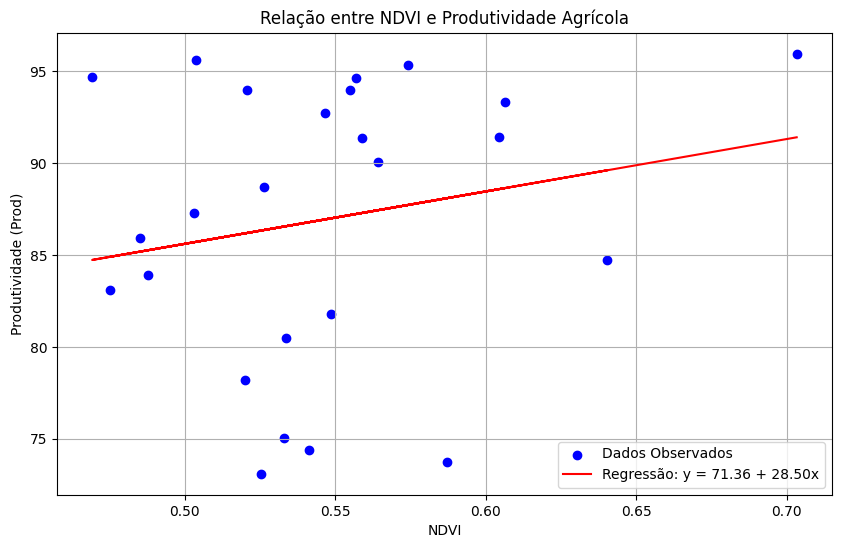

In [83]:
from scipy import stats
import matplotlib.pyplot as plt


#Análise de Correlação
correlacao = dfnovo['Prod'].corr(dfnovo['NDVI'])
print(f"Coeficiente de Correlação (r): {correlacao:.4f}")

# Interpretação da correlação
if abs(correlacao) >= 0.7:
    print("Correlação forte")
elif abs(correlacao) >= 0.5:
    print("Correlação moderada")
elif abs(correlacao) >= 0.3:
    print("Correlação fraca")
else:
    print("Praticamente nenhuma correlação")

# 2. Regressão Linear
slope, intercept, r_value, p_value, std_err = stats.linregress(dfnovo['NDVI'], dfnovo['Prod'])
print(f"Coeficiente de Determinação (R²): {r_value**2:.4f}")


# 3. Visualização
plt.figure(figsize=(10, 6))
plt.scatter(dfnovo['NDVI'], dfnovo['Prod'], color='blue', label='Dados Observados')
plt.plot(dfnovo['NDVI'], intercept + slope*dfnovo['NDVI'], 'r-', label=f'Regressão: y = {intercept:.2f} + {slope:.2f}x')
plt.xlabel('NDVI')
plt.ylabel('Produtividade (Prod)')
plt.title('Relação entre NDVI e Produtividade Agrícola')
plt.legend()
plt.grid(True)
plt.show()